# **Spotify 1000 Audio Features**

# Get the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import pairwise_distances
import numpy as np
from scipy import stats

In [ ]:
url = "https://drive.google.com/file/d/1I87JU8W7VDXoqlvnEdLxdf-5wEHO4yNj/view?usp=share_link" 
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]

df = pd.read_csv(path, index_col=["name", "artist"])
df = df.drop(columns=["type", "id", "html"])
df

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
name,artist,,,,,,,,,,,,,
All Shook Up,Elvis Presley,0.6240,0.46800,10,-12.162,1,0.1320,0.881,0.000006,0.1440,0.9520,74.139,117080,4
I've Got You Under My Skin - Remastered 1998,Frank Sinatra,0.5850,0.24700,1,-12.612,1,0.0400,0.452,0.000009,0.1070,0.5910,127.150,223760,4
Smoke Gets In Your Eyes,The Platters,0.2900,0.22700,3,-13.060,1,0.0311,0.944,0.000079,0.6170,0.2240,114.278,157293,4
"What'd I Say, Pt. 1 & 2",Ray Charles,0.5400,0.68100,4,-5.440,1,0.0508,0.808,0.000000,0.1620,0.7940,88.385,307053,4
Dream A Little Dream Of Me,Ella Fitzgerald,0.4550,0.16700,0,-13.613,1,0.0739,0.918,0.000000,0.1730,0.4040,76.118,185067,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",Pyotr Ilyich Tchaikovsky,0.2020,0.06940,3,-23.390,1,0.0473,0.917,0.715000,0.0832,0.0655,87.906,995000,4
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",Tristan Murail,0.1880,0.10100,6,-21.873,1,0.0442,0.855,0.426000,0.0694,0.0355,83.134,855000,4
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",Arnold Schoenberg,0.0596,0.00093,9,-42.959,1,0.0434,0.951,0.969000,0.0772,0.0344,71.573,238187,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1440 entries, ('All Shook Up', 'Elvis Presley') to ('Ravel: Boléro, M. 81', 'Maurice Ravel')
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      1440 non-null   float64
 1   energy            1440 non-null   float64
 2   key               1440 non-null   int64  
 3   loudness          1440 non-null   float64
 4   mode              1440 non-null   int64  
 5   speechiness       1440 non-null   float64
 6   acousticness      1440 non-null   float64
 7   instrumentalness  1440 non-null   float64
 8   liveness          1440 non-null   float64
 9   valence           1440 non-null   float64
 10  tempo             1440 non-null   float64
 11  duration_ms       1440 non-null   int64  
 12  time_signature    1440 non-null   int64  
dtypes: float64(9), int64(4)
memory usage: 233.9+ KB


## Using the transformer "MinMaxScaler" to scale data

In [ ]:
# 1. import the transformer
from sklearn.preprocessing import MinMaxScaler
 
# 2. initialize the transformer (optionally, set parameters)
min_max_df = MinMaxScaler(feature_range=(0,1))
 
# 3. fit the transformer to the data
min_max_df.fit(df)
 
# 4. use the transformer to transform the data
scaled_audio_features_1000 = min_max_df.transform(df)
 
# 5. reconvert the transformed data back to a DataFrame
min_max_df = pd.DataFrame(scaled_audio_features_1000,
             index=df.index,
             columns=df.columns)

min_max_df

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
name,artist,,,,,,,,,,,,,
All Shook Up,Elvis Presley,0.624060,0.469869,0.909091,0.708800,1.0,0.196816,0.884538,0.000006,0.127865,0.965817,0.156106,0.014474,0.75
I've Got You Under My Skin - Remastered 1998,Frank Sinatra,0.580938,0.247977,0.090909,0.698907,1.0,0.030391,0.453814,0.000009,0.089495,0.591879,0.494567,0.042899,0.75
Smoke Gets In Your Eyes,The Platters,0.254755,0.227896,0.272727,0.689059,1.0,0.014291,0.947791,0.000081,0.618376,0.211726,0.412383,0.025189,0.75
"What'd I Say, Pt. 1 & 2",Ray Charles,0.531181,0.683728,0.363636,0.856565,1.0,0.049928,0.811245,0.000000,0.146531,0.802155,0.247063,0.065093,0.75
Dream A Little Dream Of Me,Ella Fitzgerald,0.437196,0.167654,0.000000,0.676903,1.0,0.091715,0.921687,0.000000,0.157938,0.398177,0.168742,0.032589,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",Pyotr Ilyich Tchaikovsky,0.157452,0.069660,0.272727,0.461981,1.0,0.043596,0.920683,0.725888,0.064814,0.047545,0.244005,0.248397,0.75
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",Tristan Murail,0.141973,0.101387,0.545455,0.495329,1.0,0.037988,0.858433,0.432487,0.050503,0.016470,0.213537,0.211094,0.75
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",Arnold Schoenberg,0.000000,0.000913,0.818182,0.031808,1.0,0.036541,0.954819,0.983756,0.058592,0.015330,0.139723,0.046743,0.50


In [ ]:
min_max_df2 = min_max_df.reset_index()
min_max_df2

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,All Shook Up,Elvis Presley,0.624060,0.469869,0.909091,0.708800,1.0,0.196816,0.884538,0.000006,0.127865,0.965817,0.156106,0.014474,0.75
1,I've Got You Under My Skin - Remastered 1998,Frank Sinatra,0.580938,0.247977,0.090909,0.698907,1.0,0.030391,0.453814,0.000009,0.089495,0.591879,0.494567,0.042899,0.75
2,Smoke Gets In Your Eyes,The Platters,0.254755,0.227896,0.272727,0.689059,1.0,0.014291,0.947791,0.000081,0.618376,0.211726,0.412383,0.025189,0.75
3,"What'd I Say, Pt. 1 & 2",Ray Charles,0.531181,0.683728,0.363636,0.856565,1.0,0.049928,0.811245,0.000000,0.146531,0.802155,0.247063,0.065093,0.75
4,Dream A Little Dream Of Me,Ella Fitzgerald,0.437196,0.167654,0.000000,0.676903,1.0,0.091715,0.921687,0.000000,0.157938,0.398177,0.168742,0.032589,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,"1812 Festival Overture, Op. 49: 1812 Overture,...",Pyotr Ilyich Tchaikovsky,0.157452,0.069660,0.272727,0.461981,1.0,0.043596,0.920683,0.725888,0.064814,0.047545,0.244005,0.248397,0.75
1436,"Winter Fragments pour ensemble instrumental, s...",Tristan Murail,0.141973,0.101387,0.545455,0.495329,1.0,0.037988,0.858433,0.432487,0.050503,0.016470,0.213537,0.211094,0.75
1437,"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3...",Arnold Schoenberg,0.000000,0.000913,0.818182,0.031808,1.0,0.036541,0.954819,0.983756,0.058592,0.015330,0.139723,0.046743,0.50
1438,"Serenade For Strings In E, Op.22, B. 52: 1. Mo...",Antonín Dvořák,0.081159,0.020864,0.363636,0.328922,1.0,0.033828,0.886546,0.512690,0.093643,0.040916,0.111222,0.067026,0.75


In [ ]:
min_max_df2.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000
mean,0.529984,0.496215,0.468624,0.732188,0.663194,0.114098,0.471659,0.191352,0.159381,0.469210,0.418583,0.060871,0.722396
std,0.242363,0.283055,0.321903,0.153417,0.472782,0.155920,0.376142,0.341720,0.151412,0.298122,0.201832,0.060775,0.111734
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.360902,0.243960,0.181818,0.648013,0.000000,0.027496,0.083356,0.000000,0.072592,0.202144,0.263850,0.034711,0.750000
50%,0.555506,0.531617,0.454545,0.779638,1.000000,0.045224,0.420681,0.000129,0.100902,0.473275,0.385120,0.045547,0.750000
75%,0.719427,0.735938,0.727273,0.851350,1.000000,0.118714,0.872741,0.162183,0.189049,0.725502,0.548434,0.065362,0.750000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


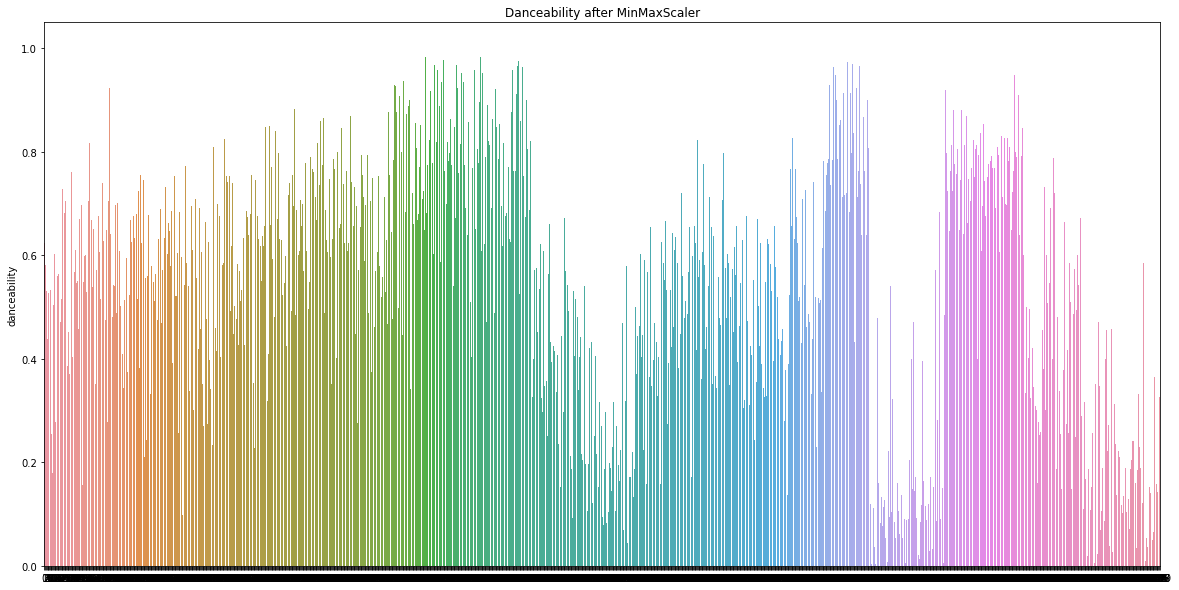

In [ ]:
# plot danceability
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(data=min_max_df2, x=min_max_df2.index, y="danceability")
plt.title("Danceability after MinMaxScaler")
plt.show()

## Using the transformer "StandardScaler" to scale data

In [ ]:
# 1. import the transformer 
from sklearn.preprocessing import StandardScaler
 
# 2. initialize the transformer (optionally, set parameters)
standard_df = StandardScaler()
 
# 3. fit the transformer to the data
standard_df.fit(df)
 
# 4. use the transformer to transform the data
scaled_audio_features = standard_df.transform(df)
 
# 5. reconvert the transformed data back to a DataFrame
standard_df = pd.DataFrame(scaled_audio_features,
             index=df.index,
             columns=df.columns)

standard_df

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
name,artist,,,,,,,,,,,,,
All Shook Up,Elvis Presley,0.388299,-0.093112,1.368799,-0.152503,0.712638,0.530704,1.098048,-0.560144,-0.208221,1.666362,-1.300917,-0.763678,0.247138
I've Got You Under My Skin - Remastered 1998,Frank Sinatra,0.210312,-0.877303,-1.173788,-0.217004,0.712638,-0.537044,-0.047460,-0.560137,-0.461722,0.411614,0.376602,-0.295809,0.247138
Smoke Gets In Your Eyes,The Platters,-1.136000,-0.948270,-0.608769,-0.281218,0.712638,-0.640337,1.266269,-0.559927,3.032485,-0.863989,-0.030729,-0.587315,0.247138
"What'd I Say, Pt. 1 & 2",Ray Charles,0.004942,0.662692,-0.326259,0.810992,0.712638,-0.411700,0.903124,-0.560163,-0.084896,1.117192,-0.850106,0.069490,0.247138
Dream A Little Dream Of Me,Ella Fitzgerald,-0.382978,-1.161173,-1.456298,-0.360482,0.712638,-0.143602,1.196844,-0.560163,-0.009531,-0.238353,-1.238292,-0.465506,0.247138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",Pyotr Ilyich Tchaikovsky,-1.537612,-1.507494,-0.608769,-1.761864,0.712638,-0.452321,1.194174,1.564798,-0.624785,-1.414896,-0.865264,3.086632,0.247138
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",Tristan Murail,-1.601505,-1.395365,0.238760,-1.544425,0.712638,-0.488299,1.028623,0.705897,-0.719334,-1.519169,-1.016273,2.472631,0.247138
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",Arnold Schoenberg,-2.187493,-1.750451,1.086289,-4.566778,0.712638,-0.497584,1.284960,2.319679,-0.665893,-1.522992,-1.382118,-0.232537,-1.991093


In [ ]:
standard_df = standard_df.reset_index()
standard_df

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,All Shook Up,Elvis Presley,0.388299,-0.093112,1.368799,-0.152503,0.712638,0.530704,1.098048,-0.560144,-0.208221,1.666362,-1.300917,-0.763678,0.247138
1,I've Got You Under My Skin - Remastered 1998,Frank Sinatra,0.210312,-0.877303,-1.173788,-0.217004,0.712638,-0.537044,-0.047460,-0.560137,-0.461722,0.411614,0.376602,-0.295809,0.247138
2,Smoke Gets In Your Eyes,The Platters,-1.136000,-0.948270,-0.608769,-0.281218,0.712638,-0.640337,1.266269,-0.559927,3.032485,-0.863989,-0.030729,-0.587315,0.247138
3,"What'd I Say, Pt. 1 & 2",Ray Charles,0.004942,0.662692,-0.326259,0.810992,0.712638,-0.411700,0.903124,-0.560163,-0.084896,1.117192,-0.850106,0.069490,0.247138
4,Dream A Little Dream Of Me,Ella Fitzgerald,-0.382978,-1.161173,-1.456298,-0.360482,0.712638,-0.143602,1.196844,-0.560163,-0.009531,-0.238353,-1.238292,-0.465506,0.247138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,"1812 Festival Overture, Op. 49: 1812 Overture,...",Pyotr Ilyich Tchaikovsky,-1.537612,-1.507494,-0.608769,-1.761864,0.712638,-0.452321,1.194174,1.564798,-0.624785,-1.414896,-0.865264,3.086632,0.247138
1436,"Winter Fragments pour ensemble instrumental, s...",Tristan Murail,-1.601505,-1.395365,0.238760,-1.544425,0.712638,-0.488299,1.028623,0.705897,-0.719334,-1.519169,-1.016273,2.472631,0.247138
1437,"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3...",Arnold Schoenberg,-2.187493,-1.750451,1.086289,-4.566778,0.712638,-0.497584,1.284960,2.319679,-0.665893,-1.522992,-1.382118,-0.232537,-1.991093
1438,"Serenade For Strings In E, Op.22, B. 52: 1. Mo...",Antonín Dvořák,-1.852512,-1.679945,-0.326259,-2.629468,0.712638,-0.514993,1.103388,0.940683,-0.434316,-1.437141,-1.523380,0.101304,0.247138


In [ ]:
standard_df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,1440.000000,1.440000e+03,1.440000e+03,1.440000e+03,1.440000e+03,1.440000e+03,1.440000e+03,1.440000e+03,1.440000e+03,1.440000e+03,1.440000e+03,1.440000e+03,1.440000e+03
mean,0.000000,-1.184238e-16,6.784696e-17,7.894919e-17,5.427757e-17,-7.894919e-17,7.894919e-17,1.184238e-16,-1.615991e-16,3.947460e-17,-1.134895e-16,7.894919e-17,-9.868649e-17
std,1.000347,1.000347e+00,1.000347e+00,1.000347e+00,1.000347e+00,1.000347e+00,1.000347e+00,1.000347e+00,1.000347e+00,1.000347e+00,1.000347e+00,1.000347e+00,1.000347e+00
min,-2.187493,-1.753679e+00,-1.456298e+00,-4.774183e+00,-1.403236e+00,-7.320242e-01,-1.254375e+00,-5.601629e-01,-1.052997e+00,-1.574433e+00,-2.074631e+00,-1.001919e+00,-6.467554e+00
25%,-0.697878,-8.914961e-01,-8.912787e-01,-5.488593e-01,-1.403236e+00,-5.556136e-01,-1.032690e+00,-5.601629e-01,-5.733996e-01,-8.961395e-01,-7.669045e-01,-4.305826e-01,2.471380e-01
50%,0.105345,1.251129e-01,-4.374976e-02,3.093923e-01,7.126383e-01,-4.418752e-01,-1.355758e-01,-5.597855e-01,-3.863568e-01,1.363969e-02,-1.658522e-01,-2.522308e-01,2.471380e-01
75%,0.781924,8.472069e-01,8.037792e-01,7.769855e-01,7.126383e-01,2.961696e-02,1.066673e+00,-8.539028e-02,1.960110e-01,8.599864e-01,6.435887e-01,7.391755e-02,2.471380e-01
max,1.939981,1.780429e+00,1.651308e+00,1.746250e+00,7.126383e-01,5.683751e+00,1.405118e+00,2.367230e+00,5.553795e+00,1.781062e+00,2.881695e+00,1.545781e+01,2.485368e+00


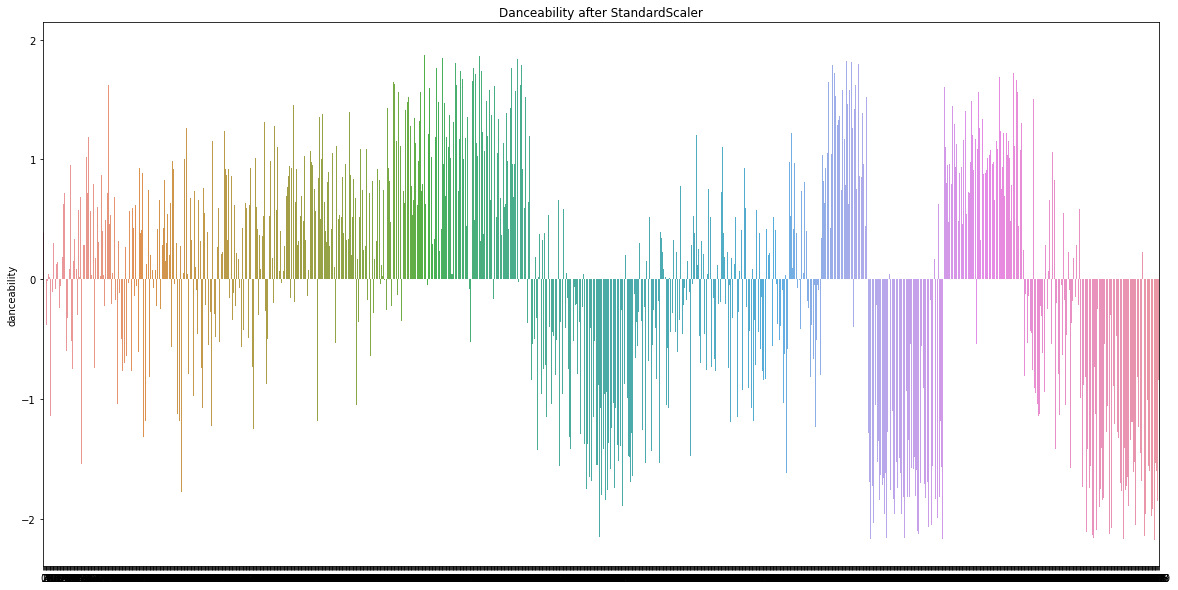

In [ ]:
# plot danceability
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(data=standard_df, x=standard_df.index, y="danceability")
plt.title("Danceability after StandardScaler")
plt.show()

## Using the transformer "RobustScaler" to scale data

In [ ]:
# 1. import the transformer 
from sklearn.preprocessing import RobustScaler
 
# 2. initialize the transformer (optionally, set parameters)
robust_df = RobustScaler()
 
# 3. fit the transformer to the data
robust_df.fit(df)
 
# 4. use the transformer to transform the data
scaled_audio_features = robust_df.transform(df)
 
# 5. reconvert the transformed data back to a DataFrame
robust_df = pd.DataFrame(scaled_audio_features,
             index=df.index,
             columns=df.columns)

robust_df

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
name,artist,,,,,,,,,,,,,
All Shook Up,Elvis Presley,0.191210,-0.125510,0.833333,-0.348378,0.0,1.661874,0.587618,-0.000755,0.231523,0.941118,-0.804729,-1.013770,0.0
I've Got You Under My Skin - Remastered 1998,Frank Sinatra,0.070933,-0.576531,-0.666667,-0.397027,0.0,-0.162618,0.041973,-0.000740,-0.097952,0.226620,0.384585,-0.086380,0.0
Smoke Gets In Your Eyes,The Platters,-0.838859,-0.617347,-0.333333,-0.445459,0.0,-0.339118,0.667748,-0.000297,4.443455,-0.499753,0.095798,-0.664191,0.0
"What'd I Say, Pt. 1 & 2",Ray Charles,-0.067849,0.309184,-0.166667,0.378324,0.0,0.051562,0.494769,-0.000795,0.391808,0.628402,-0.485117,0.637702,0.0
Dream A Little Dream Of Me,Ella Fitzgerald,-0.329992,-0.739796,-0.833333,-0.505243,0.0,0.509668,0.634678,-0.000795,0.489760,-0.143493,-0.760330,-0.422746,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",Pyotr Ilyich Tchaikovsky,-1.110254,-0.938980,-0.333333,-1.562216,0.0,-0.017848,0.633406,4.474948,-0.309884,-0.813459,-0.495864,6.618160,0.0
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",Tristan Murail,-1.153431,-0.874490,0.166667,-1.398216,0.0,-0.079326,0.554549,2.665872,-0.432769,-0.872835,-0.602924,5.401113,0.0
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",Arnold Schoenberg,-1.549422,-1.078714,0.666667,-3.677784,0.0,-0.095191,0.676651,6.064933,-0.363313,-0.875012,-0.862298,0.039037,-1.0


In [ ]:
robust_df2 = robust_df.reset_index()
robust_df2

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,All Shook Up,Elvis Presley,0.191210,-0.125510,0.833333,-0.348378,0.0,1.661874,0.587618,-0.000755,0.231523,0.941118,-0.804729,-1.013770,0.0
1,I've Got You Under My Skin - Remastered 1998,Frank Sinatra,0.070933,-0.576531,-0.666667,-0.397027,0.0,-0.162618,0.041973,-0.000740,-0.097952,0.226620,0.384585,-0.086380,0.0
2,Smoke Gets In Your Eyes,The Platters,-0.838859,-0.617347,-0.333333,-0.445459,0.0,-0.339118,0.667748,-0.000297,4.443455,-0.499753,0.095798,-0.664191,0.0
3,"What'd I Say, Pt. 1 & 2",Ray Charles,-0.067849,0.309184,-0.166667,0.378324,0.0,0.051562,0.494769,-0.000795,0.391808,0.628402,-0.485117,0.637702,0.0
4,Dream A Little Dream Of Me,Ella Fitzgerald,-0.329992,-0.739796,-0.833333,-0.505243,0.0,0.509668,0.634678,-0.000795,0.489760,-0.143493,-0.760330,-0.422746,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,"1812 Festival Overture, Op. 49: 1812 Overture,...",Pyotr Ilyich Tchaikovsky,-1.110254,-0.938980,-0.333333,-1.562216,0.0,-0.017848,0.633406,4.474948,-0.309884,-0.813459,-0.495864,6.618160,0.0
1436,"Winter Fragments pour ensemble instrumental, s...",Tristan Murail,-1.153431,-0.874490,0.166667,-1.398216,0.0,-0.079326,0.554549,2.665872,-0.432769,-0.872835,-0.602924,5.401113,0.0
1437,"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3...",Arnold Schoenberg,-1.549422,-1.078714,0.666667,-3.677784,0.0,-0.095191,0.676651,6.064933,-0.363313,-0.875012,-0.862298,0.039037,-1.0
1438,"Serenade For Strings In E, Op.22, B. 52: 1. Mo...",Antonín Dvořák,-1.323053,-1.038163,-0.166667,-2.216595,0.0,-0.124938,0.590162,3.160394,-0.062333,-0.826126,-0.962449,0.700763,0.0


In [ ]:
robust_df2.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,1440.000000,1.440000e+03,1440.000000,1.440000e+03,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1.440000e+03,1440.000000,1440.000000
mean,-0.071189,-7.195760e-02,0.025810,-2.333548e-01,-0.336806,0.755045,0.064580,1.179060,0.502146,-0.007767,1.175845e-01,0.499962,-0.110417
std,0.676001,5.753411e-01,0.590155,7.544981e-01,0.472782,1.709322,0.476501,2.107003,1.300148,0.569633,7.092182e-01,1.982849,0.446937
min,-1.549422,-1.080571e+00,-0.833333,-3.834216e+00,-1.000000,-0.495786,-0.532923,-0.000795,-0.866429,-0.904305,-1.353271e+00,-1.486002,-3.000000
25%,-0.542791,-5.846939e-01,-0.500000,-6.473243e-01,-1.000000,-0.194348,-0.427327,-0.000795,-0.243099,-0.518060,-4.261292e-01,-0.353522,0.000000
50%,0.000000,-1.134075e-16,0.000000,-9.600610e-17,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.594048e-16,0.000000,0.000000
75%,0.457209,4.153061e-01,0.500000,3.526757e-01,0.000000,0.805652,0.572673,0.999205,0.756901,0.481940,5.738708e-01,0.646478,0.000000
max,1.239784,9.520408e-01,1.000000,1.083730e+00,0.000000,10.467030,0.733887,6.165089,7.720392,1.006432,2.160625e+00,31.139813,1.000000


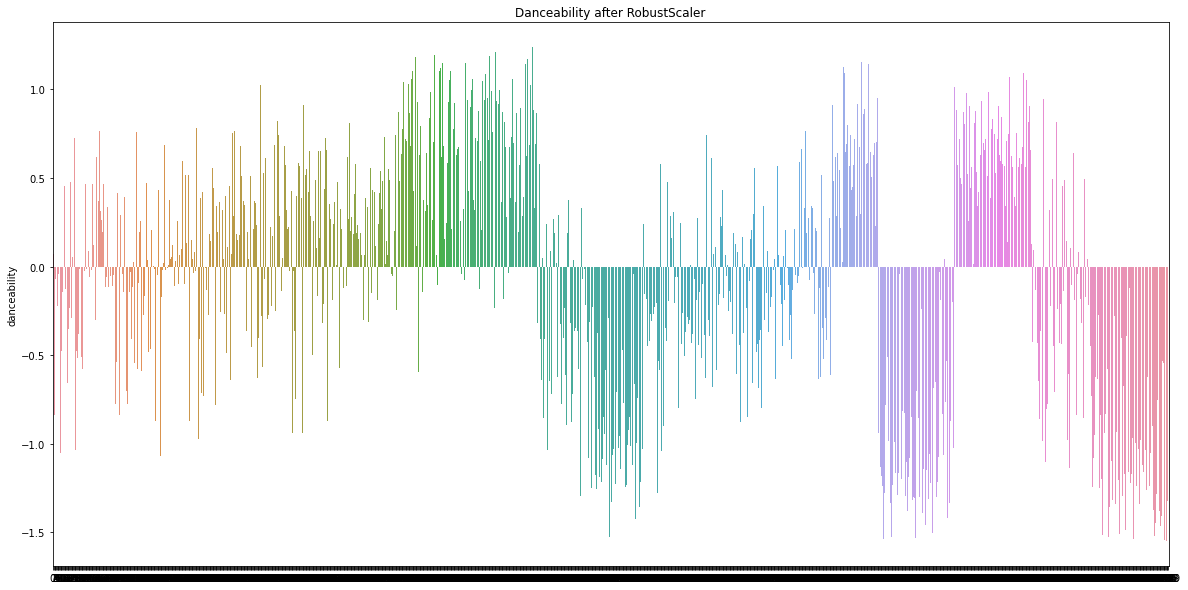

In [ ]:
# plot danceability
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(data=robust_df2, x=robust_df2.index, y="danceability")
plt.title("Danceability after RobustScaler")
plt.show()

## Using the transformer "QuantileTransformer" to scale data

In [ ]:
# 1. import the transformer 
from sklearn.preprocessing import QuantileTransformer
 
# 2. initialize the transformer (optionally, set parameters)
quantile_df = QuantileTransformer()
 
# 3. fit the transformer to the data
quantile_df.fit(df)
 
# 4. use the transformer to transform the data
scaled_audio_features = quantile_df.transform(df)
 
# 5. reconvert the transformed data back to a DataFrame
quantile_df = pd.DataFrame(scaled_audio_features,
             index=df.index,
             columns=df.columns)

quantile_df

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
name,artist,,,,,,,,,,,,,
All Shook Up,Elvis Presley,0.599600,0.442576,0.897898,0.358402,1.0,0.829830,0.763764,0.391335,0.617117,0.972973,0.065905,0.011169,0.545546
I've Got You Under My Skin - Remastered 1998,Frank Sinatra,0.538038,0.254254,0.174174,0.340413,1.0,0.301301,0.513514,0.407857,0.399900,0.617618,0.672710,0.443433,0.545546
Smoke Gets In Your Eyes,The Platters,0.172172,0.235235,0.336837,0.319437,1.0,0.075075,0.857357,0.484629,0.970409,0.257110,0.537829,0.092147,0.545546
"What'd I Say, Pt. 1 & 2",Ray Charles,0.456818,0.680681,0.397397,0.773774,1.0,0.536537,0.692693,0.000000,0.674174,0.828829,0.217308,0.747733,0.545546
Dream A Little Dream Of Me,Ella Fitzgerald,0.327327,0.184184,0.000000,0.295421,1.0,0.701017,0.807808,0.000000,0.701702,0.426426,0.083912,0.207201,0.545546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",Pyotr Ilyich Tchaikovsky,0.100082,0.076442,0.336837,0.065105,1.0,0.485485,0.806115,0.827983,0.189189,0.109108,0.213296,0.981596,0.545546
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",Tristan Murail,0.087561,0.116617,0.565566,0.088200,1.0,0.427928,0.731803,0.790888,0.111256,0.033033,0.162093,0.973142,0.545546
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",Arnold Schoenberg,0.000000,0.000975,0.815816,0.000830,1.0,0.404905,0.872372,0.996424,0.150385,0.024024,0.044254,0.524562,0.060561


In [ ]:
quantile_df = quantile_df.reset_index()
quantile_df

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,All Shook Up,Elvis Presley,0.599600,0.442576,0.897898,0.358402,1.0,0.829830,0.763764,0.391335,0.617117,0.972973,0.065905,0.011169,0.545546
1,I've Got You Under My Skin - Remastered 1998,Frank Sinatra,0.538038,0.254254,0.174174,0.340413,1.0,0.301301,0.513514,0.407857,0.399900,0.617618,0.672710,0.443433,0.545546
2,Smoke Gets In Your Eyes,The Platters,0.172172,0.235235,0.336837,0.319437,1.0,0.075075,0.857357,0.484629,0.970409,0.257110,0.537829,0.092147,0.545546
3,"What'd I Say, Pt. 1 & 2",Ray Charles,0.456818,0.680681,0.397397,0.773774,1.0,0.536537,0.692693,0.000000,0.674174,0.828829,0.217308,0.747733,0.545546
4,Dream A Little Dream Of Me,Ella Fitzgerald,0.327327,0.184184,0.000000,0.295421,1.0,0.701017,0.807808,0.000000,0.701702,0.426426,0.083912,0.207201,0.545546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,"1812 Festival Overture, Op. 49: 1812 Overture,...",Pyotr Ilyich Tchaikovsky,0.100082,0.076442,0.336837,0.065105,1.0,0.485485,0.806115,0.827983,0.189189,0.109108,0.213296,0.981596,0.545546
1436,"Winter Fragments pour ensemble instrumental, s...",Tristan Murail,0.087561,0.116617,0.565566,0.088200,1.0,0.427928,0.731803,0.790888,0.111256,0.033033,0.162093,0.973142,0.545546
1437,"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3...",Arnold Schoenberg,0.000000,0.000975,0.815816,0.000830,1.0,0.404905,0.872372,0.996424,0.150385,0.024024,0.044254,0.524562,0.060561
1438,"Serenade For Strings In E, Op.22, B. 52: 1. Mo...",Antonín Dvořák,0.036260,0.021911,0.397397,0.017299,1.0,0.352853,0.767267,0.803498,0.446446,0.100100,0.022920,0.764213,0.545546


In [ ]:
quantile_df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000
mean,0.500002,0.499992,0.495166,0.500003,0.663194,0.500004,0.499999,0.447255,0.500003,0.500004,0.500004,0.500002,0.500179
std,0.288985,0.288981,0.302120,0.288982,0.472782,0.288976,0.288968,0.349371,0.288959,0.288980,0.288975,0.288978,0.171687
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.249249,0.250000,0.271772,0.249970,0.000000,0.250250,0.250101,0.000000,0.250000,0.250062,0.250025,0.250022,0.545546
50%,0.499499,0.499910,0.485986,0.500025,1.000000,0.499499,0.500041,0.500050,0.500000,0.499659,0.500022,0.500219,0.545546
75%,0.749562,0.749249,0.731732,0.750034,1.000000,0.750065,0.748999,0.750023,0.751251,0.749750,0.750049,0.749970,0.545546
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


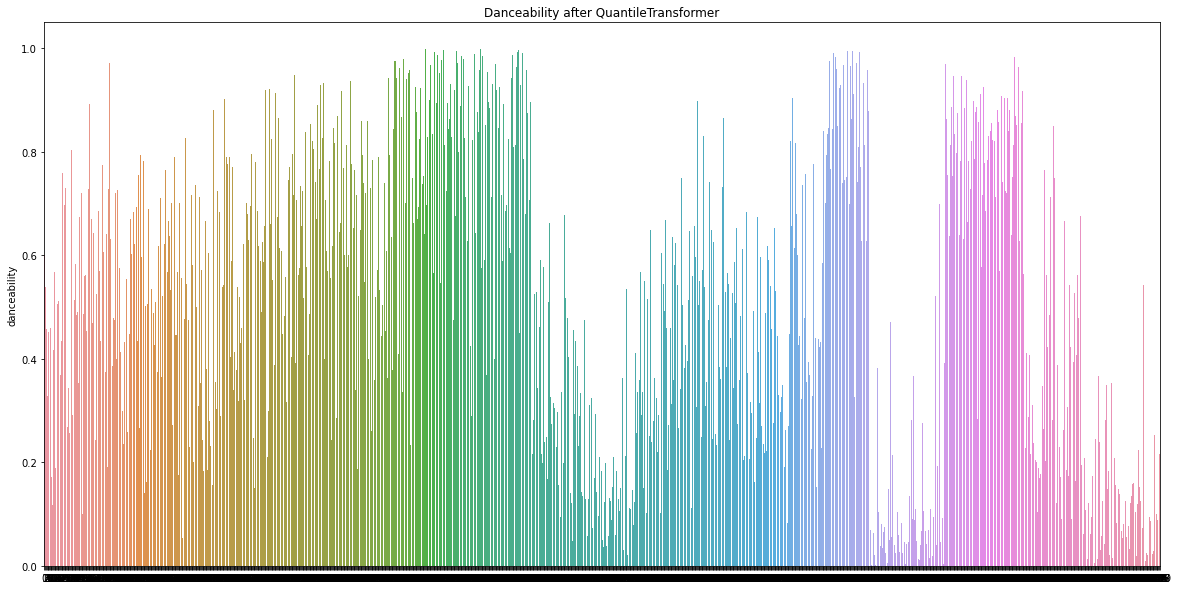

In [ ]:
# plot danceability
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(data=quantile_df, x=quantile_df.index, y="danceability")
plt.title("Danceability after QuantileTransformer")
plt.show()